In [4]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import sys; sys.path.insert(0, '/Users/erezcohen/Desktop/Software/mySoftware/Python/'); 
from my_tools               import *; 
from plot_tools             import *;
from my_data_analysis_tools import *;
%config InlineBackend.figure_format = 'retina'
main_data_path = '/Users/erezcohen/Desktop/data/BAND/AnalysisFiles/AnalysisCSVfiles/'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

# Prepare a file for the spin-assymetries analysis chain

last edit Aug-20, 2021 (EOC, mbp)

In [5]:
run_number = 6420
e_pims = pd.read_csv(main_data_path 
                     + "skimmed_SIDIS_inc_00%d_e_piminus_selected_events"%run_number
                     + ".csv")
e_pips = pd.read_csv(main_data_path 
                     + "skimmed_SIDIS_inc_00%d_e_piplus_selected_events"%run_number
                     + ".csv")

# 1. Apply SIDIS kinematical cuts

In [20]:
Wmin = 2
Zmin = 0.4

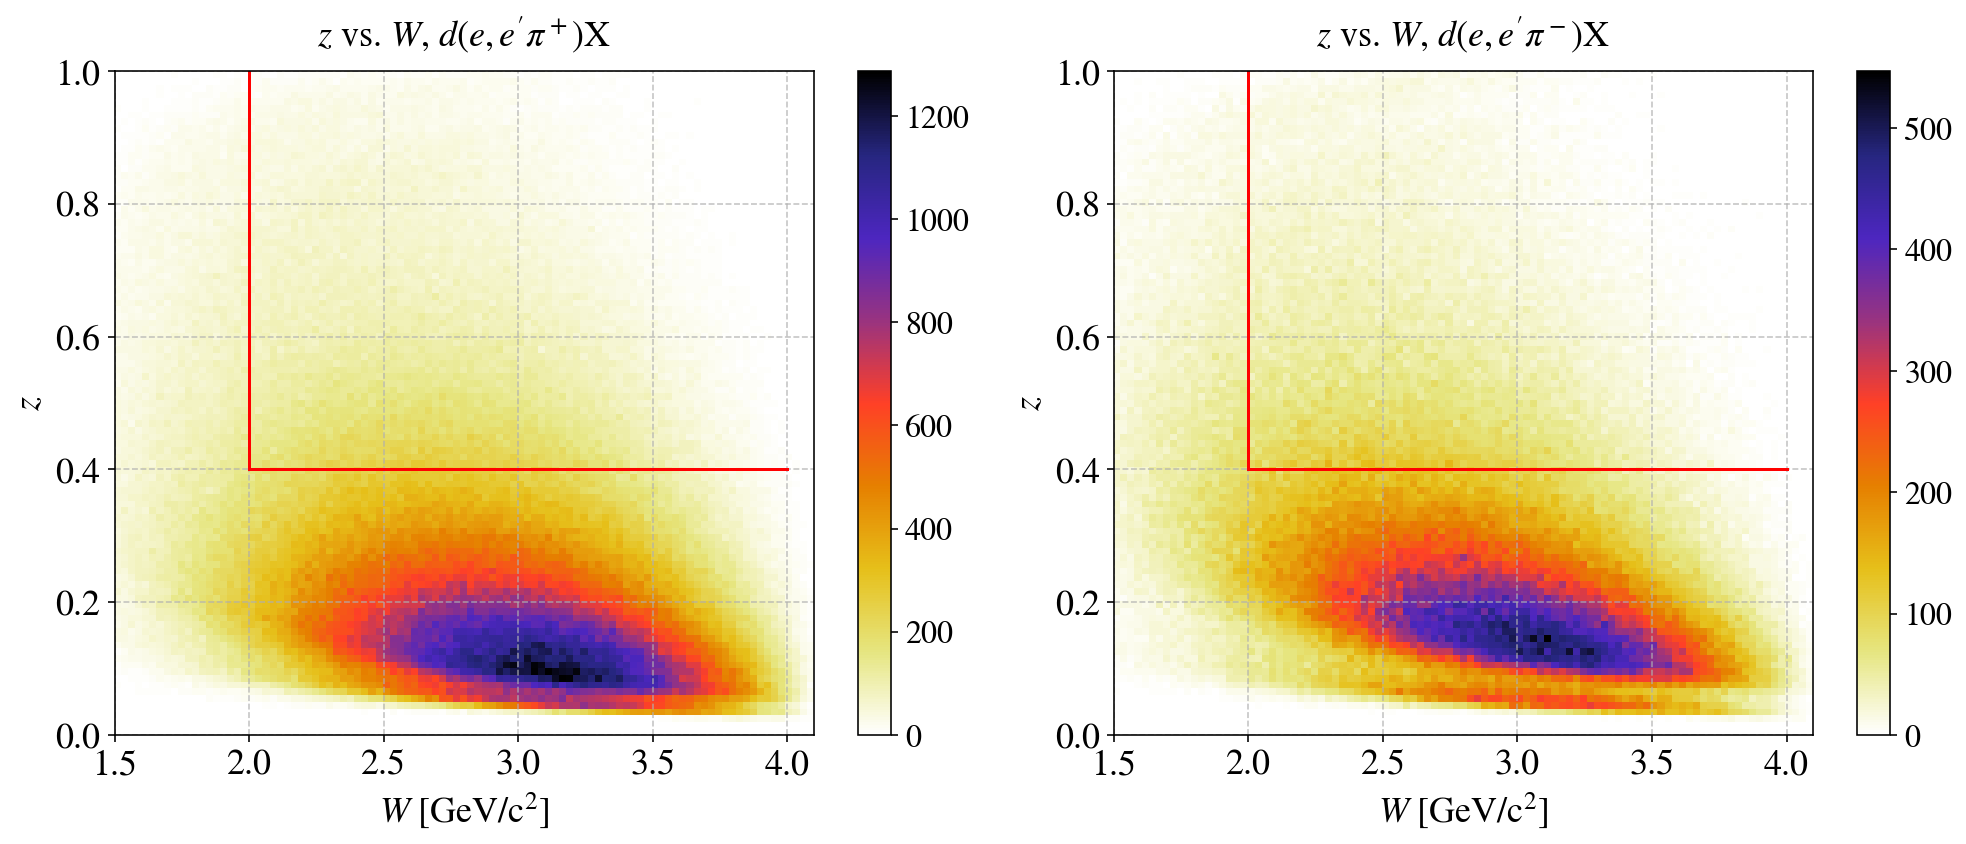

In [25]:
Nbins = 100

bins = (np.linspace(1.5,4.1,Nbins),np.linspace(0,1,Nbins))
xlim = [1.5,4]
ylim = [0,1]

fig = plt.figure(figsize=(14,6))

for df,df_label,subplotIdx in zip([e_pips,e_pims],                                  
                                  ["$d(e,e'\pi^+)$X","$d(e,e'\pi^-)$X"],
                                  [1,2]):
    ax = fig.add_subplot(1,2,subplotIdx)
    h=ax.hist2d( df['     W'], df['          Zpi'] , bins=bins, cmap='CMRmap_r' )
    cbar=fig.colorbar(h[3],ax=ax); cbar.ax.tick_params(labelsize=16)
    set_axes(ax,'$W$ [GeV/c$^2$]','$z$',ylim=ylim,
             title = '$z$ vs. $W$, '+ df_label,fontsize=18,do_add_grid=True);

    plt.plot([Wmin,Wmin],[Zmin,np.max(ylim)], '-r')
    plt.plot( [Wmin,np.max(xlim)],[Zmin,Zmin], '-r')
    
plt.tight_layout()